In [105]:
from statistics import kde

import pandas as pd


In [106]:
df = pd.read_csv("car_prices.csv")
df.head()

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928
3,A004,108694,12454
4,A005,124879,6634


In [107]:
df.isna().any()

car_id           False
mileage          False
selling_price    False
dtype: bool

In [108]:
df.shape

(300, 3)

In [109]:
import matplotlib.pyplot as plt

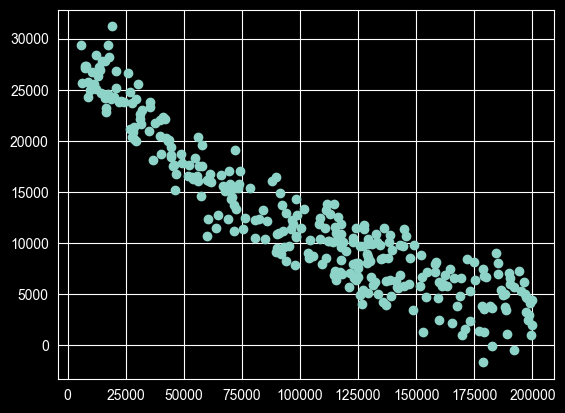

In [110]:
plt.scatter(df.mileage, df["selling_price"])

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[["mileage"]]
y = df[["selling_price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [112]:
X.shape, X_train.shape

((300, 1), (240, 1))

In [113]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
poly = PolynomialFeatures(degree=2)
poly.fit_transform(np.array([[1], [2], [3], [4]]))

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [114]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [115]:
X_train[:5]

,mileage
232,111081
59,129358
6,59886
185,145546
173,151779


In [116]:
X_train_poly[:5]

array([[1.00000000e+00, 1.11081000e+05, 1.23389886e+10],
       [1.00000000e+00, 1.29358000e+05, 1.67334922e+10],
       [1.00000000e+00, 5.98860000e+04, 3.58633300e+09],
       [1.00000000e+00, 1.45546000e+05, 2.11836381e+10],
       [1.00000000e+00, 1.51779000e+05, 2.30368648e+10]])

In [117]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [118]:
model.coef_, model.intercept_

(array([[ 0.00000000e+00, -2.37400736e-01,  5.80295929e-07]]),
 array([28880.66553808]))

In [119]:
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(4823730.839860689, 0.9157255575145027)

In [120]:
x_range = np.linspace(X['mileage'].min(), X['mileage'].max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)



/Users/minhaz74692/Documents/Personal/AI-ML/python-dsa/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


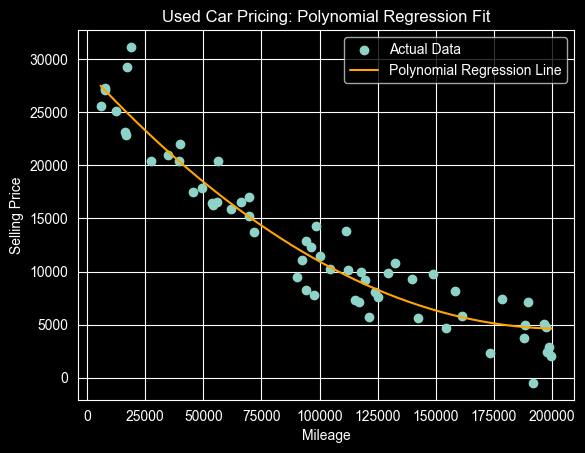

In [121]:
plt.scatter(X_test['mileage'], y_test, label='Actual Data')
plt.plot(x_range, y_range_pred, color='orange', label='Polynomial Regression Line')
plt.title('Used Car Pricing: Polynomial Regression Fit')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.legend()
plt.show()